# Pytanic - Exploring the Titanic through Python

Hello and Welcome to my Guide to predict the survivability of the famous Kaggle competition.

The Basic Stages of the notebook are as follows:
1. Objective
2. Data Understanding
3. Data Preparation
4. Model Building
  * 4a. Instantiate
  * 4b. Fit
  * 4c. Predict
  * 4d. Score
5. Results/Model Evaluation

> ## Objective
Things to Check:
* Q> Are Females more prone to Surviving
* Q> Are kids more prone to surviving
* Q> Is there any relationship beteen the cabin and surviving

## 2. Data Understanding

### Load the Data

In [13]:
# Import all the necessary packages. Packages loaded later in code as well as and when required

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [14]:
# Import the DataSets

df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Explore the Data

In [15]:
# Checking Distributions

df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# Separating the Vairable Types

display("Categorical Variables", df_train.dtypes[(df_train.dtypes == object)])
display("Continuous Variables", df_train.dtypes[(df_train.dtypes != object)])

'Categorical Variables'

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

'Continuous Variables'

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [17]:
# Show the columns with missing values

df_train.isnull().sum()[(df_train.isnull().sum() > 0)]

Age         177
Cabin       687
Embarked      2
dtype: int64

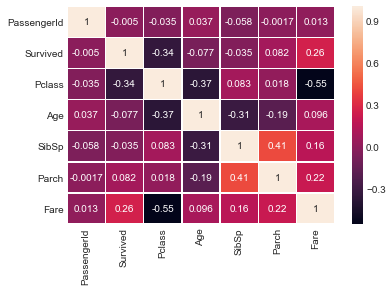

In [18]:
# Check visual correlation plot

#plt.figure(figsize = (12,8))
sns.heatmap(df_train.corr(), annot=True, linewidths=.5);

> **Notable Features from this correlation plot**
* ***Survived***, the DV has strong -ve correlation with ***Pclass***
* ***Survived*** is positively correlated to ***Fare***
* ***Fare*** and ***Pclass*** are nevatively correlated, which explains the above points
* ***Pclass*** also has a negative correlation with ***Age*** which says that older people preferred 1st class
* ***Age*** is inversely related to ***Sibling/Spouse*** :: Lower aged has more siblings/spouse
* ***Parent/Children*** also has a direct correlation with ***Siblings/Spouse***. Says that they prefer travelling with family.

### Univariate and Bivariate Explorations

In [46]:
# Pclass vs Fare
sns.scatterplot(x='Pclass',y='Fare',data=df_train,palette='summer');

AttributeError: module 'seaborn' has no attribute 'scatterplot'

In [20]:
# Who pays so much?????
# len(df_train[df_train['Fare'] > 200])  #20 people paid >200 :O
df_train[df_train['Fare'] > 200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [21]:
# whats with the ticket ?

# df[['Ticketa','Ticketb','Ticketc']] = df.Ticket.str.rsplit(' ', n=2, expand=True)  :: does not work

split_tickets = df_train['Ticket'].str.rsplit(n=1)
prefixes = [sp[0] if len(sp) == 2 else '' for sp in split_tickets]
df_train['Ticketid'] = prefixes
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticketid
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,A/5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,PC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STON/O2.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,


In [22]:
df_train.Ticketid.value_counts()

               665
PC              60
C.A.            27
STON/O 2.       12
A/5             10
W./C.            9
CA.              8
SOTON/O.Q.       8
SOTON/OQ         7
A/5.             7
STON/O2.         6
CA               6
F.C.C.           5
SC/PARIS         5
C                5
S.O.C.           5
SC/Paris         4
A/4              3
S.O./P.P.        3
PP               3
A/4.             3
SC/AH            2
A./5.            2
S.C./PARIS       2
P/PP             2
SOTON/O2         2
A.5.             2
WE/P             2
A/S              1
S.W./PP          1
S.O.P.           1
C.A./SOTON       1
SCO/W            1
W/C              1
SW/PP            1
S.C./A.4.        1
A4.              1
SC               1
SC/AH Basle      1
SO/C             1
S.P.             1
Fa               1
F.C.             1
W.E.P.           1
Name: Ticketid, dtype: int64

In [23]:
split_tickets = df['Ticket'].str.rsplit(n=1)
prefixes = [sp[0] if len(sp) == 2 else '' for sp in split_tickets]
df['TicketPrefix'] = prefixes
df

NameError: name 'df' is not defined

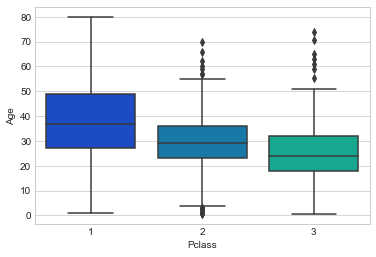

In [24]:
# Pclass vs age
sns.boxplot(x='Pclass',y='Age',data=df_train,palette='winter')

In [25]:
# Survived vs Age
g= sea.FacetGrid(df_train,col='Survived')
g.map(sea.distplot,'Age');

NameError: name 'sea' is not defined

In [26]:
# Survived vs Fare
g= sea.FacetGrid(df_train,col='Survived')
g.map(sea.distplot,'Fare');

NameError: name 'sea' is not defined

In [27]:
# Survived vs Pclass
g= sea.FacetGrid(df_train,col='Survived')
g.map(sea.distplot,'Pclass');

NameError: name 'sea' is not defined

In [28]:
# Survived vs Pclass Distribution
g = sns.FacetGrid(df_train, col='Survived', row='Pclass', height=2.5, aspect=1.8)
g.map(plt.hist, 'Age', alpha=.5, bins=20);

TypeError: __init__() got an unexpected keyword argument 'height'

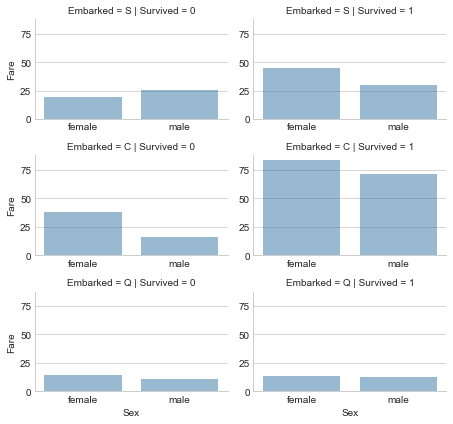

In [29]:
# Survived vs Sex
g = sns.FacetGrid(df_train, row='Embarked', col='Survived', size=2, aspect=1.6)
g.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None);

In [30]:
# Survived vs Pclass vs Fare
g = sns.catplot(x="Fare", y="Survived", row="Pclass", kind="box", orient="h", height=1.5, aspect=4, data=df_train.query("Fare > 0"))
g.set(xscale="log");

AttributeError: module 'seaborn' has no attribute 'catplot'

In [ ]:
# Survived vs Sibsp
g= sea.FacetGrid(df_train,col='Survived')
g.map(sea.distplot,'SibSp');

## 3. Data Preparation

### Cleaning Data

In [31]:
df_train_clean = df_train
df_train_clean.shape

(891, 13)

In [32]:
df_train_clean = df_train_clean[df_train_clean['SibSp'] < 8]
df_train_clean.shape

(884, 13)

In [33]:
df_train_clean = df_train_clean[df_train['Fare'] < 500];
df_train_clean.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(881, 13)

### Merging Test and Train to impute values in both

In [34]:
df = pd.concat([df_train, df_test], ignore_index=True, sort=False)
df.set_index('PassengerId', inplace=True)
df.head()

TypeError: concat() got an unexpected keyword argument 'sort'

In [35]:
df.isnull().sum()

NameError: name 'df' is not defined

In [36]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Embarked'].value_counts()

NameError: name 'df' is not defined

In [37]:
temp=df.loc[(df['Pclass']==3) & (df['Parch']==0) & (df['SibSp']==0) & (df['Fare']>0)].sort_values(by=['Fare'],ascending=False)
temp.head()

NameError: name 'df' is not defined

In [38]:
df['Fare']=df['Fare'].fillna(temp['Fare'].mean())

NameError: name 'df' is not defined

In [39]:
nullAgeSubset=df.loc[df['Age'].isnull()]
nullAgeSubset.shape

NameError: name 'df' is not defined

In [40]:
for index in nullAgeSubset.index:
    ageSubsetMean=df['Age'].loc[(df['Parch']==nullAgeSubset.loc[index]['Parch'])&(df['SibSp']==nullAgeSubset.loc[index]['SibSp'])&(df['Pclass']==nullAgeSubset.loc[index]['Pclass'])&(df['Embarked']==nullAgeSubset.loc[index]['Embarked'])&(df['Sex']==nullAgeSubset.loc[index]['Sex'])].mean()
    if(ageSubsetMean>0):
        df['Age'].loc[index]=ageSubsetMean
    else:
        ageSubsetMean=df['Age'].loc[(df['Parch']==nullAgeSubset.loc[index]['Parch'])&(df['SibSp']==nullAgeSubset.loc[index]['SibSp'])&(df['Pclass']==nullAgeSubset.loc[index]['Pclass'])&(df['Embarked']==nullAgeSubset.loc[index]['Embarked'])].mean()
        if(ageSubsetMean>0):
            df['Age'].loc[index]=ageSubsetMean
        else:
            ageSubsetMean=df['Age'].loc[(df['Parch']==nullAgeSubset.loc[index]['Parch'])&(df['SibSp']==nullAgeSubset.loc[index]['SibSp'])&(df['Pclass']==nullAgeSubset.loc[index]['Pclass'])].mean()
            if(ageSubsetMean>0):
                df['Age'].loc[index]=ageSubsetMean
            else:
                df['Age'].loc[index]=df['Age'].mean()
                

NameError: name 'nullAgeSubset' is not defined

In [41]:
df.isnull().sum()

NameError: name 'df' is not defined

In [42]:
df.drop(['Cabin','Name','Ticket'],axis=1, inplace=True)

NameError: name 'df' is not defined

In [43]:
df.isnull().sum()

NameError: name 'df' is not defined

In [44]:
df.describe()

NameError: name 'df' is not defined

### Featurizing / Prepping Data + Standardizing and Breaking into Train/Test

In [45]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler

df['Embarked']=LabelEncoder().fit_transform(df['Embarked'])
df['Sex']=LabelEncoder().fit_transform(df['Sex'])
df['Age']=StandardScaler().fit_transform(np.array(df['Age']).reshape(-1,1))
df['Fare']=StandardScaler().fit_transform(np.array(df['Fare']).reshape(-1,1))

NameError: name 'df' is not defined

In [ ]:
df.describe()

In [ ]:
df_train_final = df[df.Survived.notnull()]
df_test_final = df[df.Survived.isnull()].drop(['Survived'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (df_train_final.drop(['Survived'], axis=1),
                                                     df_train_final['Survived'], 
                                                     test_size=0.1,random_state=101)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

## 4. Model Building

### Load the Required Libraries

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from xgboost import XGBClassifier

### Fit Model and Predict

In [0]:
model = XGBClassifier (learning_rate=0.001, n_estimators=50, max_depth=8)
model.fit (X_train, y_train)
accuracy_score (y_test, model.predict(X_test))

0.8555555555555555

### Export the final output

In [0]:
df_test_final['Survived'] = model.predict(df_test_final).astype(int)
df_test_final

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
PassengerId,,,,,,,,
892,3,1,0.366856,0,0,-0.491999,1,0
893,3,0,1.302454,1,0,-0.508030,2,0
894,2,1,2.425172,0,0,-0.456071,1,0
895,3,1,-0.194503,0,0,-0.475888,2,0
896,3,0,-0.568743,1,1,-0.405804,2,0
897,3,1,-1.167525,0,0,-0.465013,2,0
898,3,0,0.030040,0,0,-0.495865,1,0
899,2,1,-0.269351,1,1,-0.082691,2,0
900,3,0,-0.868134,0,0,-0.503599,0,1


In [0]:
df_test_final[['Survived']].to_csv('output.csv')

## Results and Final Thoughts

Using the XGBoost algorithm yields better results, however, there are theories that simple models yield good results as well. This all depends on the features(variables) selected and tuning the hyperparameters.
I have had better models with Deciscion Tree and Logistic Regression as well in initail cases. Feel free to use your own algorithm and explore. Thats the key in building better models: Exploration !
Happy Coding :)